## **Read data from kaggle**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehranehmgh","key":"8b10f8963aaf16fe2e6d644d4dbfd5dd"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 77% 72.0M/93.0M [00:00<00:00, 90.5MB/s]
100% 93.0M/93.0M [00:00<00:00, 119MB/s] 


In [ ]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
  inflating: /content/immo_data.csv  


In [ ]:
import pandas as pd

df = pd.read_csv('/content/immo_data.csv')
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Krei

### **Process Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [ ]:
df = df.drop(columns = ['facilities','description','scoutId','street','streetPlain','houseNumber','date'])

In [ ]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,Dortmund,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,NaN,NaN,NaN,NaN,NaN
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,NaN,NaN,2019.0,NaN,NaN
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,1.0,NaN,False,Sachsen,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,NaN,NaN,NaN,NaN,NaN
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,NaN,district_heating,False,Sachsen,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,87.23,NaN,NaN,NaN,NaN
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,NaN,gas,False,Bremen,False,1.0,765.0,84.97,Bremen,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,1.0,geothermal,False,Bayern,True,9.0,820.0,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,NaN,NaN,NaN,NaN,NaN
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,1.0,gas,True,Hessen,False,4.0,930.0,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,NaN,NaN,2015.0,NaN,NaN
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,1.0,gas,False,Hessen,True,2.0,650.0,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,NaN,NaN,2019.0,NaN,NaN
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,1015.0,2019.0,1.0,gas,False,Nordrhein_Westfalen,True,9.0,840.0,70.00,Köln,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.70,NaN,5.0,2,False,3,Köln,Dellbrück,40.00,NO_INFORMATION,2019.0,NaN,NaN


In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
noParkSpaces                175798
firingTypes                  56964
yearConstructedRange         57045
condition                    68489
interiorQual                112665
petsAllowed                 114573
typeOfFlat                   36614
thermalChar                 106506
floor                        51309
numberOfFloors               97732
heatingCosts                183332
energyEfficiencyClass       191063
lastRefurbish               188139
electricityBasePrice        222004
electricityKwhPrice         222004
dtype: int64

In [ ]:
df.isna().sum()[df.isnull().sum() > 0]/len(df)

serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
noParkSpaces                0.653889
firingTypes                 0.211880
yearConstructedRange        0.212182
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
typeOfFlat                  0.136187
thermalChar                 0.396154
floor                       0.190846
numberOfFloors              0.363519
heatingCosts                0.681912
energyEfficiencyClass       0.710668
lastRefurbish               0.699792
electricityBasePrice        0.825754
electricityKwhPrice         0.825754
dtype: float64

In [ ]:
df.columns[((df.isna().sum()/len(df)) > 0.50)]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [ ]:
df = df.drop(columns = df.columns[((df.isna().sum()/len(df)) > 0.50)])

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

serviceCharge             6909
heatingType              44856
telekomTvOffer           32619
pricetrend                1832
telekomUploadSpeed       33358
totalRent                40517
yearConstructed          57045
firingTypes              56964
yearConstructedRange     57045
condition                68489
interiorQual            112665
petsAllowed             114573
typeOfFlat               36614
thermalChar             106506
floor                    51309
numberOfFloors           97732
dtype: int64

In [ ]:
df.sample(10)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
235122,Thüringen,78.72,central_heating,ONE_YEAR_FREE,False,True,13,2.18,40.0,435.97,1929.0,gas,False,Thüringen,False,1.0,302.75,60.55,Gera,refurbished,normal,NaN,False,2,ground_floor,7546,3.0,122.0,NaN,NaN,3,False,2,Gera,Gera_Ost
176485,Rheinland_Pfalz,140.00,central_heating,ONE_YEAR_FREE,False,True,22,3.08,40.0,NaN,2002.0,natural_gas_light,True,Rheinland_Pfalz,True,6.0,495.00,74.54,Ahrweiler_Kreis,well_kept,normal,NaN,True,3,loft,53498,2.0,118.8,3.0,3.0,2,False,3,Ahrweiler_Kreis,Bad_Breisig
30670,Rheinland_Pfalz,250.00,central_heating,ONE_YEAR_FREE,False,True,9,4.84,2.4,1750.00,1985.0,gas,False,Rheinland_Pfalz,False,4.0,1500.00,248.75,Rhein_Lahn_Kreis,first_time_use,NaN,NaN,True,7,apartment,56130,6.0,NaN,NaN,3.0,5,False,7,Rhein_Lahn_Kreis,Bad_Ems
78729,Nordrhein_Westfalen,150.00,self_contained_central_heating,ONE_YEAR_FREE,False,False,4,3.28,10.0,515.00,1962.0,gas,False,Nordrhein_Westfalen,True,2.0,365.00,73.00,Wuppertal,well_kept,normal,negotiable,False,2,apartment,42289,3.0,202.0,3.0,4.0,3,False,3,Wuppertal,Heckinghausen
163350,Nordrhein_Westfalen,130.00,gas_heating,ONE_YEAR_FREE,False,True,4,3.23,10.0,337.00,1950.0,gas,False,Nordrhein_Westfalen,False,1.0,207.00,37.70,Duisburg,NaN,NaN,NaN,False,1,ground_floor,47053,2.0,197.0,0.0,NaN,2,False,1,Duisburg,Dellviertel
254964,Bayern,180.00,heat_pump,NaN,True,True,10,2.18,NaN,1570.00,2019.0,NaN,True,Bayern,True,9.0,1390.00,111.00,Ingolstadt,first_time_use,sophisticated,NaN,False,7,roof_storey,85055,4.0,NaN,3.0,3.0,4,False,5,Ingolstadt,Nordost
89559,Schleswig_Holstein,80.00,NaN,NaN,True,True,13,4.32,NaN,1077.00,2019.0,district_heating,True,Schleswig_Holstein,False,9.0,957.00,87.00,Segeberg_Kreis,NaN,NaN,NaN,False,6,NaN,24576,2.0,39.0,NaN,NaN,2,True,4,Segeberg_Kreis,Bad_Bramstedt
174356,Nordrhein_Westfalen,190.00,central_heating,ONE_YEAR_FREE,False,True,7,1.69,40.0,750.00,1995.0,district_heating,False,Nordrhein_Westfalen,True,5.0,560.00,86.00,Recklinghausen_Kreis,mint_condition,sophisticated,negotiable,False,4,apartment,45770,3.5,95.7,3.0,4.0,3,False,4,Recklinghausen_Kreis,Marl
63873,Baden_Württemberg,120.00,gas_heating,ONE_YEAR_FREE,False,True,9,3.57,40.0,NaN,2000.0,gas,True,Baden_Württemberg,True,5.0,640.00,54.00,Emmendingen_Kreis,well_kept,NaN,no,False,5,other,79331,2.0,75.0,NaN,NaN,2,False,2,Emmendingen_Kreis,Teningen
255589,Nordrhein_Westfalen,140.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,12,1.76,40.0,NaN,1920.0,gas,False,Nordrhein_Westfalen,True,1.0,595.00,88.00,Hagen,well_kept,sophisticated,negotiable,True,4,apartment,58135,2.5,125.0,2.0,4.0,2,False,4,Hagen,Haspe


## **Fillna Numerics**

In [ ]:
import numpy as np
numeric_data = df.select_dtypes(include = np.number)
numeric_data

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
0,245.00,6,4.62,10.0,840.0,1965.0,2.0,595.0,86.00,4,44269,4.0,181.40,1.0,3.0,4,4
1,134.00,8,3.47,10.0,NaN,1871.0,1.0,800.0,89.00,5,67459,3.0,NaN,NaN,NaN,3,4
2,255.00,8,2.72,2.4,1300.0,2019.0,9.0,965.0,83.80,6,1097,3.0,NaN,3.0,4.0,3,4
3,58.15,9,1.53,40.0,NaN,1964.0,2.0,343.0,58.15,2,9599,3.0,86.00,3.0,NaN,3,2
4,138.00,19,2.46,NaN,903.0,1950.0,1.0,765.0,84.97,5,28213,3.0,188.90,1.0,NaN,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,90.00,0,2.74,10.0,910.0,2016.0,9.0,820.0,90.00,6,82390,3.0,NaN,NaN,NaN,3,4
268846,220.00,12,6.49,NaN,1150.0,1983.0,4.0,930.0,115.00,6,68519,3.5,NaN,1.0,1.0,3,5
268847,220.00,21,2.90,40.0,930.0,1965.0,2.0,650.0,95.00,5,65552,4.0,160.77,1.0,2.0,4,4
268848,175.00,16,4.39,NaN,1015.0,2019.0,9.0,840.0,70.00,6,51069,2.0,24.70,NaN,5.0,2,3


In [ ]:
numeric_data.isnull().sum()[numeric_data.isnull().sum() > 0]

serviceCharge             6909
pricetrend                1832
telekomUploadSpeed       33358
totalRent                40517
yearConstructed          57045
yearConstructedRange     57045
thermalChar             106506
floor                    51309
numberOfFloors           97732
dtype: int64

In [ ]:
numeric_data.dtypes

serviceCharge           float64
picturecount              int64
pricetrend              float64
telekomUploadSpeed      float64
totalRent               float64
yearConstructed         float64
yearConstructedRange    float64
baseRent                float64
livingSpace             float64
baseRentRange             int64
geo_plz                   int64
noRooms                 float64
thermalChar             float64
floor                   float64
numberOfFloors          float64
noRoomsRange              int64
livingSpaceRange          int64
dtype: object

In [ ]:
df._get_numeric_data().mean()

serviceCharge             151.206113
newlyConst                  0.078747
balcony                     0.616455
picturecount                9.791958
pricetrend                  3.389001
telekomUploadSpeed         28.804928
totalRent                 901.331522
yearConstructed          1966.400590
hasKitchen                  0.342407
cellar                      0.640636
yearConstructedRange        3.714544
baseRent                  694.129432
livingSpace                74.355548
lift                        0.235529
baseRentRange               3.765256
geo_plz                 37283.022235
noRooms                     2.641261
thermalChar               114.749533
floor                       2.122405
numberOfFloors              3.572319
noRoomsRange                2.571542
garden                      0.196232
livingSpaceRange            3.070790
dtype: float64

In [ ]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [ ]:
df._get_numeric_data().dtypes

serviceCharge           float64
newlyConst                 bool
balcony                    bool
picturecount              int64
pricetrend              float64
telekomUploadSpeed      float64
totalRent               float64
yearConstructed         float64
hasKitchen                 bool
cellar                     bool
yearConstructedRange    float64
baseRent                float64
livingSpace             float64
lift                       bool
baseRentRange             int64
geo_plz                   int64
noRooms                 float64
thermalChar             float64
floor                   float64
numberOfFloors          float64
noRoomsRange              int64
garden                     bool
livingSpaceRange          int64
dtype: object

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

heatingType        44856
telekomTvOffer     32619
firingTypes        56964
condition          68489
interiorQual      112665
petsAllowed       114573
typeOfFlat         36614
dtype: int64

### **Delete Outlier**

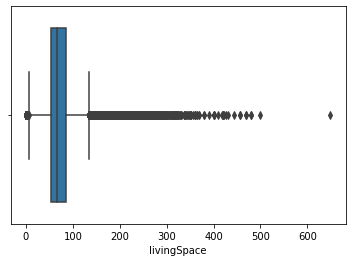

In [ ]:
import seaborn as sns
sns.boxplot(x = df['livingSpace'])

In [ ]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

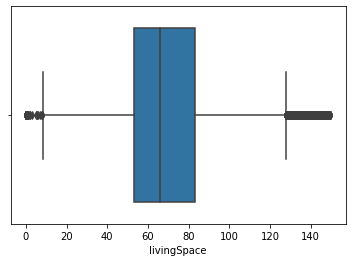

In [ ]:
sns.boxplot(x = df['livingSpace'])

In [ ]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.00000,oil,False,Nordrhein_Westfalen,True,2.000000,595.0,86.00,Dortmund,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.00000,gas,False,Rheinland_Pfalz,False,1.000000,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.00000,NaN,False,Sachsen,True,9.000000,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.00000,district_heating,False,Sachsen,False,2.000000,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,False,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.00000,gas,False,Bremen,False,1.000000,765.0,84.97,Bremen,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False,4,Bremen,Neu_Schwachhausen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,80.00,gas_heating,ONE_YEAR_FREE,False,False,12,2.58,2.400000,670.000000,1966.40059,gas,False,Nordrhein_Westfalen,False,3.714544,590.0,85.00,Essen,first_time_use_after_refurbishment,sophisticated,negotiable,False,4,roof_storey,45279,3.0,114.749533,3.000000,3.000000,3,False,4,Essen,Horst
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,2016.00000,geothermal,False,Bayern,True,9.000000,820.0,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False,4,Weilheim_Schongau_Kreis,Eberfing
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,28.804928,1150.000000,1983.00000,gas,True,Hessen,False,4.000000,930.0,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False,5,Bergstraße_Kreis,Viernheim
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,1965.00000,gas,False,Hessen,True,2.000000,650.0,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.770000,1.000000,2.000000,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn


### **Fillna Categorical**

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

heatingType       39292
telekomTvOffer    27864
firingTypes       50468
condition         60426
interiorQual      99324
petsAllowed       99507
typeOfFlat        32379
dtype: int64

In [ ]:
df['geo_bln'].value_counts()

Nordrhein_Westfalen       55693
Sachsen                   54170
Sachsen_Anhalt            18582
Bayern                    17323
Niedersachsen             14826
Hessen                    14179
Baden_Württemberg         13451
Thüringen                  7705
Rheinland_Pfalz            7439
Brandenburg                6447
Mecklenburg_Vorpommern     6187
Schleswig_Holstein         5924
Berlin                     5629
Hamburg                    2856
Bremen                     2692
Saarland                   1244
Name: geo_bln, dtype: int64

In [ ]:
df['geo_bln'].value_counts().head(1)

Nordrhein_Westfalen    55693
Name: geo_bln, dtype: int64

In [ ]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('column : ',cols)
        print(df[cols].value_counts().head(1))

column :  regio1
Nordrhein_Westfalen    55693
Name: regio1, dtype: int64
column :  heatingType
central_heating    113878
Name: heatingType, dtype: int64
column :  telekomTvOffer
ONE_YEAR_FREE    198842
Name: telekomTvOffer, dtype: int64
column :  newlyConst
False    216619
Name: newlyConst, dtype: int64
column :  balcony
True    141700
Name: balcony, dtype: int64
column :  firingTypes
gas    97783
Name: firingTypes, dtype: int64
column :  hasKitchen
False    158406
Name: hasKitchen, dtype: int64
column :  geo_bln
Nordrhein_Westfalen    55693
Name: geo_bln, dtype: int64
column :  cellar
True    151020
Name: cellar, dtype: int64
column :  geo_krs
Leipzig    12442
Name: geo_krs, dtype: int64
column :  condition
well_kept    59694
Name: condition, dtype: int64
column :  interiorQual
normal    74867
Name: interiorQual, dtype: int64
column :  petsAllowed
negotiable    80353
Name: petsAllowed, dtype: int64
column :  lift
False    185688
Name: lift, dtype: int64
column :  typeOfFlat
apartment 

In [ ]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    print('cols : {} , value : {}'.format(cols , df[cols].value_counts().head(1).index[0]))
    df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

cols : regio1 , value : Nordrhein_Westfalen
cols : heatingType , value : central_heating
cols : telekomTvOffer , value : ONE_YEAR_FREE
cols : newlyConst , value : False
cols : balcony , value : True
cols : firingTypes , value : gas
cols : hasKitchen , value : False
cols : geo_bln , value : Nordrhein_Westfalen
cols : cellar , value : True
cols : geo_krs , value : Leipzig
cols : condition , value : well_kept
cols : interiorQual , value : normal
cols : petsAllowed , value : negotiable
cols : lift , value : False
cols : typeOfFlat , value : apartment
cols : garden , value : False
cols : regio2 , value : Leipzig
cols : regio3 , value : Innenstadt


In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.00000,oil,False,Nordrhein_Westfalen,True,2.000000,595.0,86.00,Dortmund,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.00000,gas,False,Rheinland_Pfalz,False,1.000000,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.00000,gas,False,Sachsen,True,9.000000,965.0,83.80,Dresden,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.00000,district_heating,False,Sachsen,False,2.000000,343.0,58.15,Mittelsachsen_Kreis,well_kept,normal,negotiable,False,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2.46,28.804928,903.000000,1950.00000,gas,False,Bremen,False,1.000000,765.0,84.97,Bremen,refurbished,normal,negotiable,False,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False,4,Bremen,Neu_Schwachhausen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,80.00,gas_heating,ONE_YEAR_FREE,False,False,12,2.58,2.400000,670.000000,1966.40059,gas,False,Nordrhein_Westfalen,False,3.714544,590.0,85.00,Essen,first_time_use_after_refurbishment,sophisticated,negotiable,False,4,roof_storey,45279,3.0,114.749533,3.000000,3.000000,3,False,4,Essen,Horst
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,2016.00000,geothermal,False,Bayern,True,9.000000,820.0,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False,4,Weilheim_Schongau_Kreis,Eberfing
268846,Hessen,220.00,gas_heating,ONE_YEAR_FREE,False,True,12,6.49,28.804928,1150.000000,1983.00000,gas,True,Hessen,False,4.000000,930.0,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False,5,Bergstraße_Kreis,Viernheim
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,1965.00000,gas,False,Hessen,True,2.000000,650.0,95.00,Limburg_Weilburg_Kreis,well_kept,normal,negotiable,False,5,apartment,65552,4.0,160.770000,1.000000,2.000000,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn


In [ ]:
df['regio1'].unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Hamburg', 'Niedersachsen', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Bayern', 'Berlin', 'Brandenburg',
       'Saarland'], dtype=object)

In [ ]:
df['regio2'].nunique()

419

In [ ]:
df['regio3'].nunique()

8435

In [ ]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , unique values : {}'.format(cols,df[cols].nunique()))

cols : regio1 , unique values : 16
cols : heatingType , unique values : 13
cols : telekomTvOffer , unique values : 3
cols : newlyConst , unique values : 2
cols : balcony , unique values : 2
cols : firingTypes , unique values : 120
cols : hasKitchen , unique values : 2
cols : geo_bln , unique values : 16
cols : cellar , unique values : 2
cols : geo_krs , unique values : 419
cols : condition , unique values : 10
cols : interiorQual , unique values : 4
cols : petsAllowed , unique values : 3
cols : lift , unique values : 2
cols : typeOfFlat , unique values : 10
cols : garden , unique values : 2
cols : regio2 , unique values : 419
cols : regio3 , unique values : 8435


In [ ]:
df = df.drop(columns = ['firingTypes','geo_krs','regio2','regio3'])
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.00000,False,Nordrhein_Westfalen,True,2.000000,595.0,86.00,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.00000,False,Rheinland_Pfalz,False,1.000000,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False,4
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.00000,False,Sachsen,True,9.000000,965.0,83.80,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False,4
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.00000,False,Sachsen,False,2.000000,343.0,58.15,well_kept,normal,negotiable,False,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False,2
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2.46,28.804928,903.000000,1950.00000,False,Bremen,False,1.000000,765.0,84.97,refurbished,normal,negotiable,False,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,80.00,gas_heating,ONE_YEAR_FREE,False,False,12,2.58,2.400000,670.000000,1966.40059,False,Nordrhein_Westfalen,False,3.714544,590.0,85.00,first_time_use_after_refurbishment,sophisticated,negotiable,False,4,roof_storey,45279,3.0,114.749533,3.000000,3.000000,3,False,4
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,2016.00000,False,Bayern,True,9.000000,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False,4
268846,Hessen,220.00,gas_heating,ONE_YEAR_FREE,False,True,12,6.49,28.804928,1150.000000,1983.00000,True,Hessen,False,4.000000,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False,5
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,1965.00000,False,Hessen,True,2.000000,650.0,95.00,well_kept,normal,negotiable,False,5,apartment,65552,4.0,160.770000,1.000000,2.000000,4,True,4


## **Label Encoding #regio1**

In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'regio1'. 
df['regio1']= label_encoder.fit_transform(df['regio1']) 
  
df['regio1'].unique() 

array([ 9, 10, 12,  4, 14,  0, 15,  6,  5,  8, 13,  7,  1,  2,  3, 11])

In [ ]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
0,9,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.00000,False,Nordrhein_Westfalen,True,2.000000,595.0,86.00,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4
1,10,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.00000,False,Rheinland_Pfalz,False,1.000000,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False,4
2,12,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.00000,False,Sachsen,True,9.000000,965.0,83.80,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False,4
3,12,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.00000,False,Sachsen,False,2.000000,343.0,58.15,well_kept,normal,negotiable,False,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False,2
4,4,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2.46,28.804928,903.000000,1950.00000,False,Bremen,False,1.000000,765.0,84.97,refurbished,normal,negotiable,False,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,9,80.00,gas_heating,ONE_YEAR_FREE,False,False,12,2.58,2.400000,670.000000,1966.40059,False,Nordrhein_Westfalen,False,3.714544,590.0,85.00,first_time_use_after_refurbishment,sophisticated,negotiable,False,4,roof_storey,45279,3.0,114.749533,3.000000,3.000000,3,False,4
268845,1,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,2016.00000,False,Bayern,True,9.000000,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False,4
268846,6,220.00,gas_heating,ONE_YEAR_FREE,False,True,12,6.49,28.804928,1150.000000,1983.00000,True,Hessen,False,4.000000,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False,5
268847,6,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,1965.00000,False,Hessen,True,2.000000,650.0,95.00,well_kept,normal,negotiable,False,5,apartment,65552,4.0,160.770000,1.000000,2.000000,4,True,4


## **Normalizing Numeric Data**

In [ ]:
df.describe()

,regio1,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
count,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000,234347.000000
mean,8.531746,140.137973,9.093699,3.224435,28.793043,748.253888,1967.924826,3.703852,564.399389,69.067419,3.495893,36681.834105,2.540078,111.241064,1.995241,3.393125,2.495995,2.900711
std,4.212067,64.561030,5.221321,1.811356,15.255118,334.827887,33.006324,2.380830,314.439340,24.355809,2.005945,27691.192064,0.875911,32.848608,1.194312,1.024830,0.871657,1.214319
min,0.000000,0.000000,0.000000,-2.250000,1.000000,0.000000,1868.000000,1.000000,0.000000,0.000000,1.000000,852.000000,1.000000,5.600000,-1.000000,0.000000,1.000000,1.000000
25%,6.000000,94.500000,5.000000,1.920000,10.000000,480.000000,1959.000000,2.000000,330.000000,53.015000,2.000000,9119.000000,2.000000,97.100000,1.000000,3.000000,2.000000,2.000000
50%,9.000000,132.000000,9.000000,3.300000,40.000000,698.000000,1966.400590,3.714544,461.760000,65.710000,3.000000,38179.000000,2.500000,114.749533,2.000000,3.572319,2.000000,3.000000
75%,12.000000,178.000000,12.000000,4.410000,40.000000,901.331522,1992.000000,5.000000,725.900000,83.000000,5.000000,55130.000000,3.000000,114.749533,3.000000,4.000000,3.000000,4.000000
max,15.000000,392.770000,26.000000,8.840000,40.000000,2148.140000,2029.000000,9.000000,1686.810000,149.700000,8.000000,99998.000000,5.000000,220.500000,6.000000,7.000000,5.000000,6.000000


In [ ]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        if cols != 'livingSpace':
            df[cols] = ((df[cols] - df[cols].mean())/(df[cols].std()))

## **Correlation Matrix**

In [ ]:
corr = df.corr()

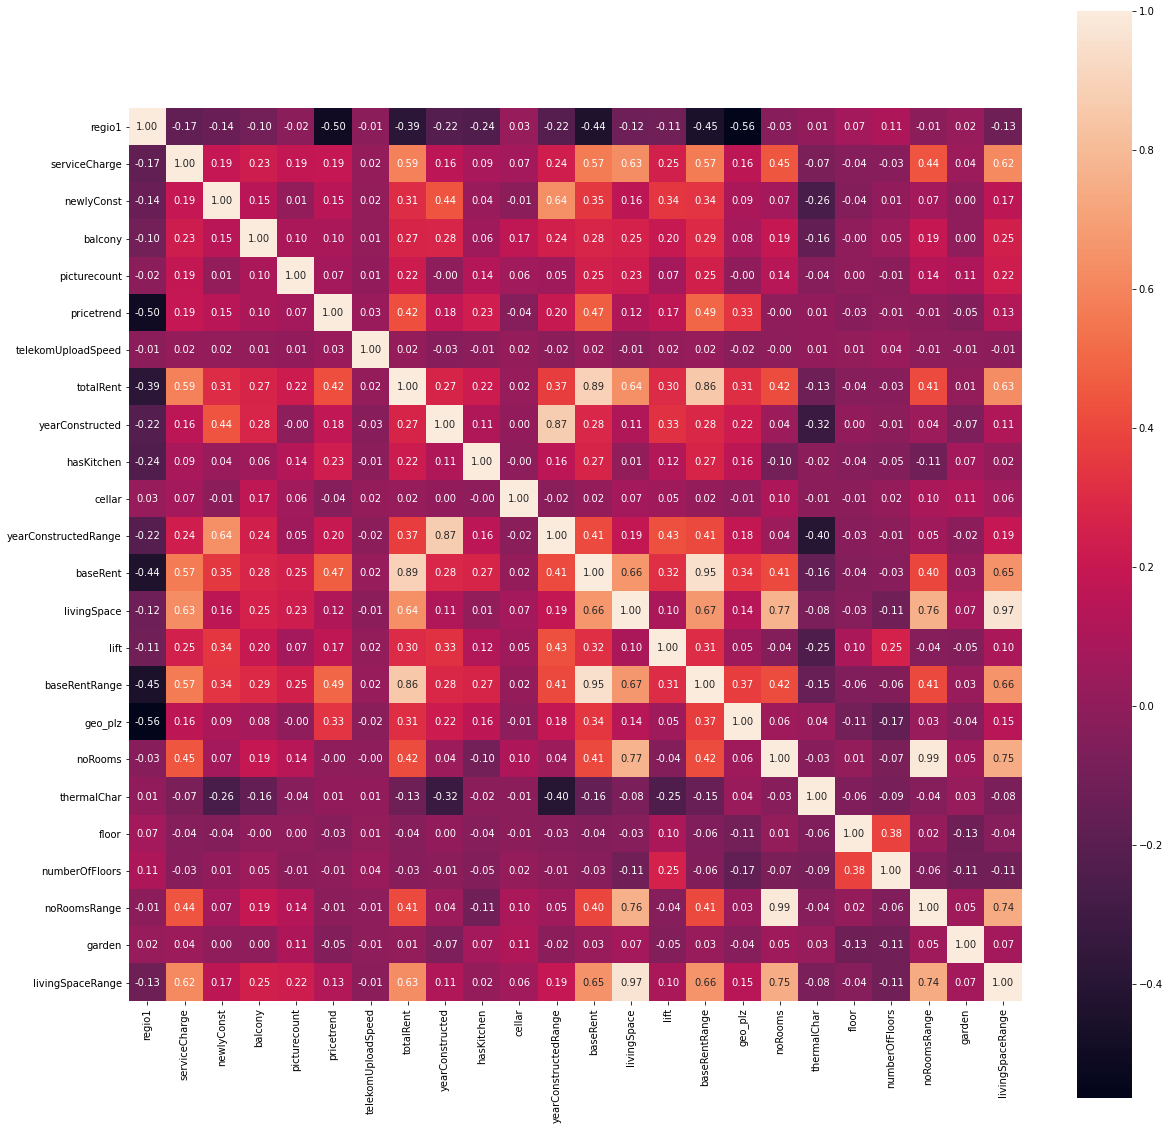

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234347 entries, 0 to 268848
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                234347 non-null  float64
 1   serviceCharge         234347 non-null  float64
 2   heatingType           234347 non-null  object 
 3   telekomTvOffer        234347 non-null  object 
 4   newlyConst            234347 non-null  bool   
 5   balcony               234347 non-null  bool   
 6   picturecount          234347 non-null  float64
 7   pricetrend            234347 non-null  float64
 8   telekomUploadSpeed    234347 non-null  float64
 9   totalRent             234347 non-null  float64
 10  yearConstructed       234347 non-null  float64
 11  hasKitchen            234347 non-null  bool   
 12  geo_bln               234347 non-null  object 
 13  cellar                234347 non-null  bool   
 14  yearConstructedRange  234347 non-null  float64
 15  

## **OneHot categorical data**

In [ ]:
categorical_columns = []
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        categorical_columns.append(cols)
        
categorical_columns

['heatingType',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'condition',
 'interiorQual',
 'petsAllowed',
 'lift',
 'typeOfFlat',
 'garden']

In [ ]:
categorical_feature = pd.get_dummies(df[categorical_columns])
categorical_feature.head()

,newlyConst,balcony,hasKitchen,cellar,lift,garden,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,geo_bln_Baden_Württemberg,geo_bln_Bayern,geo_bln_Berlin,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,False,False,False,True,False,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,True,True,False,True,True,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,False,True,False,False,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, categorical_feature], axis=1)
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,newlyConst,balcony,hasKitchen,cellar,lift,garden,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,...,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0.111170,1.624231,central_heating,ONE_YEAR_FREE,False,False,-0.592513,0.770453,-1.231917,0.274010,-0.088614,False,Nordrhein_Westfalen,True,-0.715655,0.097318,86.00,well_kept,normal,negotiable,False,0.251307,ground_floor,0.273992,1.666747,2.135827,-0.833318,-0.383600,1.725454,True,0.905272,False,False,False,True,False,True,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0.348583,-0.095072,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.209468,0.135570,-1.231917,0.457183,-2.936553,False,Rheinland_Pfalz,False,-1.135676,0.749272,89.00,refurbished,normal,no,False,0.749825,ground_floor,1.111442,0.525079,0.106807,0.106474,0.174852,0.578214,False,0.905272,False,True,False,False,False,False,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.823409,1.779123,floor_heating,ONE_YEAR_FREE,True,True,-0.209468,-0.278485,-1.730111,1.647850,1.547436,False,Sachsen,True,2.224496,1.274016,83.80,first_time_use,sophisticated,negotiable,True,1.248343,apartment,-1.285060,0.525079,0.106807,0.841286,0.592172,0.578214,False,0.905272,True,True,False,True,True,False,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.823409,-1.269930,district_heating,ONE_YEAR_FREE,False,True,-0.017945,-0.935451,0.734636,0.457183,-0.118911,False,Sachsen,False,-0.715655,-0.704108,58.15,well_kept,normal,negotiable,False,-0.745730,other,-0.978031,0.525079,-0.768406,0.841286,0.174852,0.578214,False,-0.741742,False,True,False,False,False,False,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,-1.075896,-0.033116,self_contained_central_heating,ONE_YEAR_FREE,False,True,1.897279,-0.422024,0.000779,0.462166,-0.543072,False,Bremen,False,-1.135676,0.637963,84.97,refurbished,normal,negotiable,False,0.749825,apartment,-0.305831,0.525079,2.364147,-0.833318,0.174852,0.578214,False,0.905272,False,True,False,False,False,False,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(columns = categorical_columns)
df.head()

,regio1,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,geo_bln_Baden_Württemberg,geo_bln_Bayern,geo_bln_Berlin,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0.111170,1.624231,-0.592513,0.770453,-1.231917,0.274010,-0.088614,-0.715655,0.097318,86.00,0.251307,0.273992,1.666747,2.135827,-0.833318,-0.383600,1.725454,0.905272,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0.348583,-0.095072,-0.209468,0.135570,-1.231917,0.457183,-2.936553,-1.135676,0.749272,89.00,0.749825,1.111442,0.525079,0.106807,0.106474,0.174852,0.578214,0.905272,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.823409,1.779123,-0.209468,-0.278485,-1.730111,1.647850,1.547436,2.224496,1.274016,83.80,1.248343,-1.285060,0.525079,0.106807,0.841286,0.592172,0.578214,0.905272,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.823409,-1.269930,-0.017945,-0.935451,0.734636,0.457183,-0.118911,-0.715655,-0.704108,58.15,-0.745730,-0.978031,0.525079,-0.768406,0.841286,0.174852,0.578214,-0.741742,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,-1.075896,-0.033116,1.897279,-0.422024,0.000779,0.462166,-0.543072,-1.135676,0.637963,84.97,0.749825,-0.305831,0.525079,2.364147,-0.833318,0.174852,0.578214,0.905272,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(234347, 77)

In [ ]:
df.head()

,regio1,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,geo_bln_Baden_Württemberg,geo_bln_Bayern,geo_bln_Berlin,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0.111170,1.624231,-0.592513,0.770453,-1.231917,0.274010,-0.088614,-0.715655,0.097318,86.00,0.251307,0.273992,1.666747,2.135827,-0.833318,-0.383600,1.725454,0.905272,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0.348583,-0.095072,-0.209468,0.135570,-1.231917,0.457183,-2.936553,-1.135676,0.749272,89.00,0.749825,1.111442,0.525079,0.106807,0.106474,0.174852,0.578214,0.905272,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.823409,1.779123,-0.209468,-0.278485,-1.730111,1.647850,1.547436,2.224496,1.274016,83.80,1.248343,-1.285060,0.525079,0.106807,0.841286,0.592172,0.578214,0.905272,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.823409,-1.269930,-0.017945,-0.935451,0.734636,0.457183,-0.118911,-0.715655,-0.704108,58.15,-0.745730,-0.978031,0.525079,-0.768406,0.841286,0.174852,0.578214,-0.741742,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,-1.075896,-0.033116,1.897279,-0.422024,0.000779,0.462166,-0.543072,-1.135676,0.637963,84.97,0.749825,-0.305831,0.525079,2.364147,-0.833318,0.174852,0.578214,0.905272,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234347 entries, 0 to 268848
Data columns (total 77 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   regio1                                        234347 non-null  float64
 1   serviceCharge                                 234347 non-null  float64
 2   picturecount                                  234347 non-null  float64
 3   pricetrend                                    234347 non-null  float64
 4   telekomUploadSpeed                            234347 non-null  float64
 5   totalRent                                     234347 non-null  float64
 6   yearConstructed                               234347 non-null  float64
 7   yearConstructedRange                          234347 non-null  float64
 8   baseRent                                      234347 non-null  float64
 9   livingSpace                                   23

## **Split Data**

In [ ]:
y = df['livingSpace'].values
x = df.drop(columns = ['livingSpace']).values

print(x.shape)
print(y.shape)

(234347, 76)
(234347,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(187477, 76)
(187477,)
(46870, 76)
(46870,)


## ***Regression***

## with scikit-learn package(all features)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Linear = LinearRegression()

In [ ]:
Linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = Linear.predict(x_test)

In [ ]:
#MSE for test

mean_squared_error(y_pred,y_test)

30.84278175478713

In [ ]:
pred = pd.DataFrame({'test':y_test,'pred':y_pred})
pred.head()

,test,pred
0,101.06,106.268433
1,50.00,49.886108
2,71.98,72.523804
3,44.00,50.603149
4,57.32,50.030151


In [ ]:
true_lable = 0
false_lable = 0

print("enter the percent:")
p = float(input())


for i in range(y_test.shape[0]):
    if y_pred[i] < y_test[i] + p * y_test[i] and y_pred[i] > y_test[i] - p * y_test[i]:
      true_lable = true_lable + 1
    else:
      false_lable = false_lable + 1

print(true_lable)
print(false_lable)
accuracy = (true_lable / y_test.shape[0]) * 100
print(accuracy)

enter the percent:
.2
45035
1835
96.08491572434393


## with only one feature - livingSpaceRange

In [ ]:
X = df['livingSpaceRange'].values
X.shape

(234347,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X , test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(187477,)
(46870,)


In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
n = X_train.shape[0]

# Sets learning rate
lr = 0.01

# Defines number of epochs
n_epochs = 500

              
for epoch in range(n_epochs):
  error = 1/2 * (y_train - ((w * X_train) + b))
    
  if epoch % 100 == 0:    
    print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
  w_grad = 0 
  b_grad = 0
    
  w_grad = -1 * (X_train * error).mean()
  w = w - (lr * w_grad)
        
  b_grad = -1 * error.mean()
  b = b - (lr*b_grad)


epoch 0 , MSE : 1324.1416820009504
epoch 100 , MSE : 492.108215412588
epoch 200 , MSE : 186.51227011390674
epoch 300 , MSE : 74.27026955851318
epoch 400 , MSE : 33.044931189359076


In [ ]:
predict = (w * X_test) + b
pred = pd.DataFrame({'test':y_test,'pred':predict})
pred.head()

,test,pred
0,101.06,100.851843
1,50.00,47.430549
2,71.98,65.237647
3,44.00,47.430549
4,57.32,47.430549


In [ ]:
true_lable = 0
false_lable = 0

print("enter the percent:")
p = float(input())


for i in range(y_test.shape[0]):
    if predict[i] < y_test[i] + p * y_test[i] and predict[i] > y_test[i] - p * y_test[i]:
      true_lable = true_lable + 1
    else:
      false_lable = false_lable + 1

print(true_lable)
print(false_lable)
accuracy = (true_lable / y_test.shape[0]) * 100
print(accuracy)

enter the percent:
0.2
42776
4094
91.2652016215063


## **Sklearn for one feature**

In [ ]:
model_reg1 = LinearRegression()

In [ ]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)

(187477, 1)
(46870, 1)


In [ ]:
model_reg1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = model_reg1.predict(X_test)

In [ ]:
mean_squared_error(y_predict,y_test)

36.79608612924958

In [ ]:
true_lable = 0
false_lable = 0

print("enter the percent:")
p = float(input())


for i in range(y_test.shape[0]):
    if y_predict[i] < y_test[i] + p * y_test[i] and y_predict[i] > y_test[i] - p * y_test[i]:
      true_lable = true_lable + 1
    else:
      false_lable = false_lable + 1

print(true_lable)
print(false_lable)
accuracy = (true_lable / y_test.shape[0]) * 100
print(accuracy)

enter the percent:
0.2
44835
2035
95.65820354171112


In [ ]:
#cross_validation
#mean_squared_error

from sklearn.model_selection import cross_val_score

five_cv_scores1 = cross_val_score(model_reg1 , X_train, y_train , scoring='neg_mean_squared_error',cv = 5)
ten_cv_scores1 = cross_val_score(model_reg1 , X_train, y_train,scoring='neg_mean_squared_error', cv = 10)

print('mean MSE in 5-fold is {0:.2f} and in 10-fold is {1:.2f}'.format(abs(np.mean(five_cv_scores1)), abs(np.mean(ten_cv_scores1))))
print('\n -----------------')
print('MSE for five folds:', abs(five_cv_scores1) , '\n -------------------')
print('MSE for ten folds:', abs(ten_cv_scores1))

mean MSE in 5-fold is 36.46 and in 10-fold is 36.45

 -----------------
MSE for five folds: [36.5317908  36.64404974 36.2142069  36.31700056 36.56868334] 
 -------------------
MSE for ten folds: [36.620175   36.44300634 36.31298255 36.97248575 36.06203079 36.36281931
 35.97649332 36.65892014 36.82841174 36.31023945]


In [ ]:
#cross_validation
#accuracy

five_cv_scores1 = cross_val_score(model_reg1 , X_train, y_train ,cv = 5)
ten_cv_scores1 = cross_val_score(model_reg1 , X_train ,y_train, cv = 10)

print('mean accuracy in 5-fold is {0:.2f}% and in 10-fold is {1:.2f}%'.format(np.mean(five_cv_scores1) * 100, np.mean(ten_cv_scores1) * 100) )
print('\n -----------------')
print('accuracy in five folds:' , five_cv_scores1 * 100 , '\n -----------------')
print('accuracy in ten folds:', ten_cv_scores1 * 100)

mean accuracy in 5-fold is 93.84% and in 10-fold is 93.84%

 -----------------
accuracy in five folds: [93.87364333 93.84292032 93.8286636  93.83727738 93.79779114] 
 -----------------
accuracy in ten folds: [93.88808116 93.85821042 93.84626769 93.83988851 93.84751814 93.81021132
 93.81756084 93.85621855 93.74432739 93.85097918]


## **Model with 4 features**

In [ ]:
features = df[['livingSpaceRange' , 'noRooms' , 'regio1', 'thermalChar']].values

In [ ]:
features.shape

(234347, 4)

In [ ]:
features_train, features_test = train_test_split(features , test_size = 0.2, random_state = 42)

In [ ]:
model_reg2 = LinearRegression()
model_reg2.fit(features_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict_f = model_reg2.predict(features_test)

In [ ]:
mean_squared_error(predict_f,y_test)

33.777479007905285

In [ ]:
true_lable = 0
false_lable = 0

print("enter the percent:")
p = float(input())


for i in range(y_test.shape[0]):
    if predict_f[i] < y_test[i] + p * y_test[i] and predict_f[i] > y_test[i] - p * y_test[i]:
      true_lable = true_lable + 1
    else:
      false_lable = false_lable + 1

print(true_lable)
print(false_lable)
accuracy = (true_lable / y_test.shape[0]) * 100
print(accuracy)

enter the percent:
0.2
44858
2012
95.7072754427139


In [ ]:
#cross_validation
#mean_squared_error

five_cv_scores2 = cross_val_score(model_reg2 , features_train, y_train , scoring='neg_mean_squared_error',cv = 5)
ten_cv_scores2 = cross_val_score(model_reg2 , features_train, y_train,scoring='neg_mean_squared_error', cv = 10)

print('mean MSE in 5-fold is {0:.2f} and in 10-fold is {1:.2f}'.format(abs(np.mean(five_cv_scores2)), abs(np.mean(ten_cv_scores2))))
print('\n -----------------')
print('MSE for five folds:', abs(five_cv_scores2) , '\n -------------------')
print('MSE for ten folds:', abs(ten_cv_scores2))

mean MSE in 5-fold is 33.49 and in 10-fold is 33.49

 -----------------
MSE for five folds: [33.64923124 33.6751856  33.07622563 33.33851372 33.72647337] 
 -------------------
MSE for ten folds: [33.55109435 33.7509635  33.2936783  34.05578716 32.8896049  33.25959796
 33.20817511 33.47127703 33.87281953 33.58191577]


In [ ]:
#cross_validation
#accuracy

five_cv_scores2 = cross_val_score(model_reg2 , features_train, y_train ,cv = 5)
ten_cv_scores2 = cross_val_score(model_reg2 , features_train ,y_train, cv = 10)

print('mean accuracy in 5-fold is {0:.2f}% and in 10-fold is {1:.2f}%'.format(np.mean(five_cv_scores2) * 100, np.mean(ten_cv_scores2) * 100) )
print('\n -----------------')
print('accuracy in five folds:' , five_cv_scores2 * 100 , '\n -----------------')
print('accuracy in ten folds:', ten_cv_scores2 * 100)

mean accuracy in 5-fold is 94.34% and in 10-fold is 94.34%

 -----------------
accuracy in five folds: [94.35704662 94.34176073 94.36341335 94.34270426 94.2798424 ] 
 -----------------
accuracy in ten folds: [94.40031169 94.31190407 94.35793016 94.32584957 94.38876034 94.33845101
 94.293287   94.39044549 94.24636417 94.31301191]


## **Model with any features**

In [ ]:
dfeatures = df[['noRooms','yearConstructed','regio1', 'thermalChar', 'serviceCharge', 'baseRent', 'picturecount', 'numberOfFloors']].values

In [ ]:
dfeatures.shape

(234347, 8)

In [ ]:
dfeatures_train, dfeatures_test = train_test_split(dfeatures , test_size = 0.2, random_state = 42)

In [ ]:
model_reg3 = LinearRegression()
model_reg3.fit(dfeatures_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict = model_reg3.predict(dfeatures_test)

In [ ]:
mean_squared_error(predict,y_test)

136.0433232019245

In [ ]:
true_lable = 0
false_lable = 0

print("enter the percent:")
p = float(input())


for i in range(y_test.shape[0]):
    if predict[i] < y_test[i] + p * y_test[i] and predict[i] > y_test[i] - p * y_test[i]:
      true_lable = true_lable + 1
    else:
      false_lable = false_lable + 1

print(true_lable)
print(false_lable)
accuracy = (true_lable / y_test.shape[0]) * 100
print(accuracy)

enter the percent:
0.2
37168
9702
79.30019202048219


In [ ]:
#cross_validation
#mean_squared_error

five_cv_scores3 = cross_val_score(model_reg3 , dfeatures_train, y_train , scoring='neg_mean_squared_error',cv = 5)
ten_cv_scores3 = cross_val_score(model_reg3 , dfeatures_train, y_train,scoring='neg_mean_squared_error', cv = 10)
print('mean MSE in 5-fold is {0:.2f} and in 10-fold is {1:.2f}'.format(abs(np.mean(five_cv_scores3)), abs(np.mean(ten_cv_scores3))))
print('\n -----------------')
print('MSE for five folds:', abs(five_cv_scores3) , '\n -------------------')
print('MSE for ten folds:', abs(ten_cv_scores3))

mean MSE in 5-fold is 134.04 and in 10-fold is 134.05

 -----------------
MSE for five folds: [135.04501653 134.15227344 132.40128071 135.45260735 133.1621052 ] 
 -------------------
MSE for ten folds: [134.29465103 135.81916151 132.98432995 135.31818293 132.75277432
 132.03782836 136.26961656 134.64938232 131.85483251 134.48955722]


In [ ]:
#cross_validation
#accuracy

five_cv_scores3 = cross_val_score(model_reg3 , dfeatures_train, y_train ,cv = 5)
ten_cv_scores3 = cross_val_score(model_reg3 , dfeatures_train ,y_train, cv = 10)
print('mean accuracy in 5-fold is {0:.2f}% and in 10-fold is {1:.2f}%'.format(np.mean(five_cv_scores3) * 100, np.mean(ten_cv_scores3) * 100) )
print('\n -----------------')
print('accuracy in five folds:' , five_cv_scores3 * 100 , '\n -----------------')
print('accuracy in ten folds:', ten_cv_scores3 * 100)

mean accuracy in 5-fold is 77.34% and in 10-fold is 77.33%

 -----------------
accuracy in five folds: [77.35304183 77.45919889 77.4372294  77.01470843 77.41512374] 
 -----------------
accuracy in ten folds: [77.58618008 77.1102114  77.46398367 77.4541777  77.35127451 77.52412296
 76.58252553 77.43369489 77.60314321 77.22463139]


## **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, normalize=True)
ridge_reg.fit(features_train, y_train)
ridge_pred = ridge_reg.predict(features_test)

In [ ]:
mean_squared_error(ridge_pred,y_test)

39.15588429299128

In [ ]:
#cross_validation
#mean_squared_error

five_cv_scores4 = cross_val_score(ridge_reg , features_train, y_train , scoring='neg_mean_squared_error',cv = 5)
ten_cv_scores4 = cross_val_score(ridge_reg , features_train, y_train,scoring='neg_mean_squared_error', cv = 10)

print('mean MSE in 5-fold is {0:.2f} and in 10-fold is {1:.2f}'.format(abs(np.mean(five_cv_scores4)), abs(np.mean(ten_cv_scores4))))
print('\n -----------------')
print('MSE for five folds:', abs(five_cv_scores4) , '\n -------------------')
print('MSE for ten folds:', abs(ten_cv_scores4))

mean MSE in 5-fold is 38.71 and in 10-fold is 38.71

 -----------------
MSE for five folds: [38.92847139 39.00850501 38.01359671 38.43907874 39.15907335] 
 -------------------
MSE for ten folds: [38.75487553 39.11054835 38.5863513  39.41248771 37.8417328  38.22309348
 38.18657639 38.71381541 39.10624651 39.16755075]


In [ ]:
#cross_validation
#accuracy

five_cv_scores4 = cross_val_score(ridge_reg , features_train, y_train ,cv = 5)
ten_cv_scores4 = cross_val_score(ridge_reg , features_train ,y_train, cv = 10)

print('mean accuracy in 5-fold is {0:.2f}% and in 10-fold is {1:.2f}%'.format(np.mean(five_cv_scores4) * 100, np.mean(ten_cv_scores4) * 100) )
print('\n -----------------')
print('accuracy in five folds:' , five_cv_scores4 * 100 , '\n -----------------')
print('accuracy in ten folds:', ten_cv_scores4 * 100)

mean accuracy in 5-fold is 93.46% and in 10-fold is 93.45%

 -----------------
accuracy in five folds: [93.47172161 93.44563509 93.52202594 93.47717663 93.35844965] 
 -----------------
accuracy in ten folds: [93.53179896 93.40864592 93.46101422 93.43335149 93.5438862  93.49354984
 93.43776551 93.51183232 93.35741447 93.36710281]


## **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001, normalize=True)
lasso_reg.fit(features_train, y_train)
lasso_pred = lasso_reg.predict(features_test)

In [ ]:
mean_squared_error(lasso_pred,y_test)

34.0904686180294

In [ ]:
#cross_validation
#mean_squared_error

five_cv_scores5 = cross_val_score(lasso_reg , features_train, y_train , scoring='neg_mean_squared_error',cv = 5)
ten_cv_scores5 = cross_val_score(lasso_reg , features_train, y_train,scoring='neg_mean_squared_error', cv = 10)
print('mean MSE in 5-fold is {0:.2f} and in 10-fold is {1:.2f}'.format(abs(np.mean(five_cv_scores5)), abs(np.mean(ten_cv_scores5))))
print('\n -----------------')
print('MSE for five folds:', abs(five_cv_scores5) , '\n -------------------')
print('MSE for ten folds:', abs(ten_cv_scores5))

mean MSE in 5-fold is 33.72 and in 10-fold is 33.74

 -----------------
MSE for five folds: [33.85826906 33.96543229 33.27018428 33.54322109 33.95665935] 
 -------------------
MSE for ten folds: [33.79281669 33.96942363 33.62252328 34.34369022 33.11747662 33.46405796
 33.34685284 33.7882412  34.15578582 33.80074056]


In [ ]:
#cross_validation
#accuracy

five_cv_scores5 = cross_val_score(lasso_reg , features_train, y_train ,cv = 5)
ten_cv_scores5 = cross_val_score(lasso_reg , features_train ,y_train, cv = 10)

print('mean accuracy in 5-fold is {0:.2f}% and in 10-fold is {1:.2f}%'.format(np.mean(five_cv_scores5) * 100, np.mean(ten_cv_scores5) * 100) )
print('\n -----------------')
print('accuracy in five folds:' , five_cv_scores5 * 100 , '\n -----------------')
print('accuracy in ten folds:', ten_cv_scores5 * 100)

mean accuracy in 5-fold is 94.30% and in 10-fold is 94.29%

 -----------------
accuracy in five folds: [94.32199112 94.29299233 94.33036047 94.30796696 94.24080185] 
 -----------------
accuracy in ten folds: [94.35996816 94.27508669 94.30220287 94.27788106 94.34988353 94.30364721
 94.2694557  94.33732449 94.19829953 94.27595464]
